## Deep Neural Network for MNIST Classification
We'll apply all the knowledge from the lectures in this section to write a deep neural network. The problem we've chosen is referred to as the "Hello World" of deep learning because for most students it is the first deep learning algorithm they see.

The dataset is called MNIST and refers to handwritten digit recognition. You can find more about it on Yann LeCun's website (Director of AI Research, Facebook). He is one of the pioneers of what we've been talking about and of more complex approaches that are widely used today, such as covolutional neural networks (CNNs).

The dataset provides 70,000 images (28x28 pixels) of handwritten digits (1 digit per image).

The goal is to write an algorithm that detects which digit is written. Since there are only 10 digits (0, 1, 2, 3, 4, 5, 6, 7, 8, 9), this is a classification problem with 10 classes.

Our goal would be to build a neural network with 2 hidden layers.

## Import the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

## Loading the dataset

In [3]:
mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)
mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']
num_validation_samples = 0.1 * mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples, tf.int64)
num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)

def scale(image, label):
    # we make sure the value is a float
    image = tf.cast(image, tf.float32)
    image /= 255.

    return image, label

 
scaled_train_and_validation_data = mnist_train.map(scale)

test_data = mnist_test.map(scale)

BUFFER_SIZE = 10000
shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)
validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

# determine the batch size
BATCH_SIZE = 100

# we can also take advantage of the occasion to batch the train data
train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
# batch the test data
test_data = test_data.batch(num_test_samples)
validation_inputs, validation_targets = next(iter(validation_data))

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]


Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


## Model

In [4]:
input_size = 784
output_size = 10
# Use same hidden layer size for both hidden layers. Not a necessity.
hidden_layer_size = 100

#define how the model will look like
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
                             tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
                             tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
                             # the final layer is no different, we just make sure to activate it with softmax
                             tf.keras.layers.Dense(output_size, activation='softmax') # output layer
                             ])

## Choose the optimizer and the loss function

In [5]:
# we define the optimizer we'd like to use, 
# the loss function, 
# and the metrics we are interested in obtaining at each iteration
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Training Model

In [6]:
history = model.fit(train_data, epochs=100, validation_data=(validation_inputs, validation_targets), verbose =2)

Epoch 1/100
540/540 - 9s - loss: 0.8447 - accuracy: 0.7766 - val_loss: 0.4205 - val_accuracy: 0.8837
Epoch 2/100
540/540 - 4s - loss: 0.3550 - accuracy: 0.8986 - val_loss: 0.3307 - val_accuracy: 0.9055
Epoch 3/100
540/540 - 4s - loss: 0.2952 - accuracy: 0.9139 - val_loss: 0.2910 - val_accuracy: 0.9157
Epoch 4/100
540/540 - 4s - loss: 0.2625 - accuracy: 0.9240 - val_loss: 0.2565 - val_accuracy: 0.9277
Epoch 5/100
540/540 - 4s - loss: 0.2355 - accuracy: 0.9329 - val_loss: 0.2352 - val_accuracy: 0.9347
Epoch 6/100
540/540 - 4s - loss: 0.2154 - accuracy: 0.9387 - val_loss: 0.2157 - val_accuracy: 0.9402
Epoch 7/100
540/540 - 4s - loss: 0.1987 - accuracy: 0.9433 - val_loss: 0.2029 - val_accuracy: 0.9450
Epoch 8/100
540/540 - 4s - loss: 0.1846 - accuracy: 0.9472 - val_loss: 0.1915 - val_accuracy: 0.9462
Epoch 9/100
540/540 - 4s - loss: 0.1725 - accuracy: 0.9504 - val_loss: 0.1801 - val_accuracy: 0.9495
Epoch 10/100
540/540 - 4s - loss: 0.1634 - accuracy: 0.9531 - val_loss: 0.1716 - val_accura

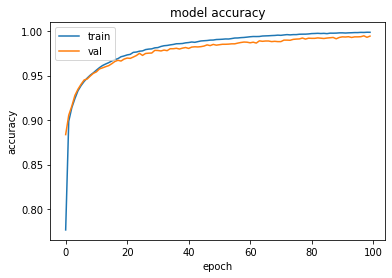

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

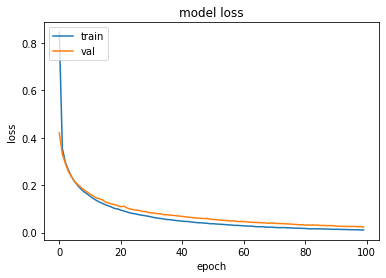

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Test the model

In [9]:
test_loss, test_accuracy = model.evaluate(test_data)
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

1/1 [==============================] - 1s 1s/step - loss: 0.0806 - accuracy: 0.9777
Test loss: 0.08. Test accuracy: 97.77%
